In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

c:\program files\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') > 0.98):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

In [3]:
df = pd.read_csv("EXTENDED_1.csv",encoding="latin-1")

# Extract features for fashion active peoples
cols = ["Do you have online shopping experience (y/n)",
              "Do you use products for grooming(y/n)",
              "Monthly frequencies of shopping",
              "Fashion Oriented"]

dataset = df[cols].copy()

In [4]:
dataset = dataset.dropna() # clear missing values rows

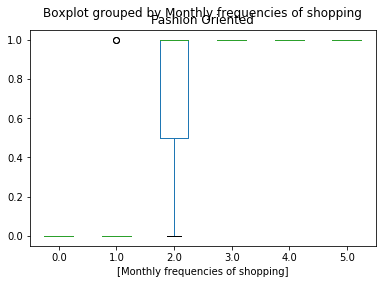

In [5]:
dataset.boxplot(by=['Monthly frequencies of shopping'], column=['Fashion Oriented'], grid= False)

In [6]:
dataset['Do you have online shopping experience (y/n)'] = (dataset['Do you have online shopping experience (y/n)'] == 'Yes').astype(float)
dataset['Do you use products for grooming(y/n)'] = (dataset['Do you use products for grooming(y/n)'] == 'Yes').astype(float)

dataset.head()

,Do you have online shopping experience (y/n),Do you use products for grooming(y/n),Monthly frequencies of shopping,Fashion Oriented
1,0.0,1.0,2.0,0.0
2,1.0,1.0,2.0,1.0
3,1.0,1.0,2.0,1.0
4,0.0,0.0,2.0,0.0
5,1.0,1.0,2.0,1.0


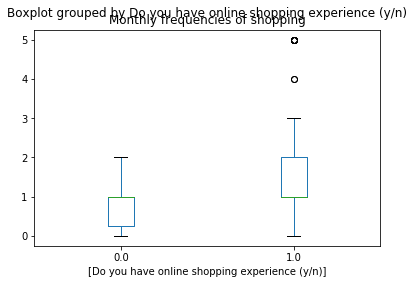

In [7]:
dataset.boxplot(by=['Do you have online shopping experience (y/n)'], column=['Monthly frequencies of shopping'], grid= False)

In [8]:
x = dataset.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataset = pd.DataFrame(x_scaled,columns=cols)

dataset.head()

,Do you have online shopping experience (y/n),Do you use products for grooming(y/n),Monthly frequencies of shopping,Fashion Oriented
0,0.0,1.0,0.4,0.0
1,1.0,1.0,0.4,1.0
2,1.0,1.0,0.4,1.0
3,0.0,0.0,0.4,0.0
4,1.0,1.0,0.4,1.0


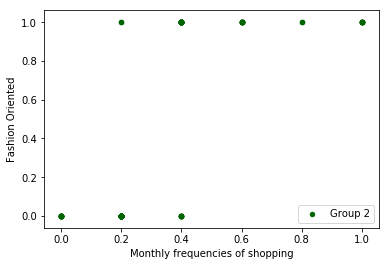

In [9]:
dataset.plot.scatter(x='Monthly frequencies of shopping', y='Fashion Oriented', color='DarkGreen', label='Group 2')

# dataset.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax2)

In [10]:
train_dataset = dataset.sample(frac=0.9,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_labels = train_dataset.pop("Fashion Oriented")
test_labels = test_dataset.pop("Fashion Oriented")

In [11]:
def build_model():
    model = keras.Sequential([
        layers.Dense(128, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(1, activation=tf.nn.sigmoid), # binary class => Hardworking or lazy
    ])
    
    model.compile(optimizer= tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

In [12]:
model = build_model()

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
model.summary() # description of the model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


In [14]:
callbacks = myCallback()

model.fit(train_dataset,train_labels,epochs=10,validation_split=0.1,callbacks=[callbacks])

Train on 83 samples, validate on 10 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
83/83 [==============================] - 0s 4ms/sample - loss: 0.6995 - acc: 0.4337 - val_loss: 0.6880 - val_acc: 0.6000
Epoch 2/10
83/83 [==============================] - 0s 144us/sample - loss: 0.6834 - acc: 0.6265 - val_loss: 0.6738 - val_acc: 0.9000
Epoch 3/10
83/83 [==============================] - 0s 228us/sample - loss: 0.6699 - acc: 0.7711 - val_loss: 0.6583 - val_acc: 0.9000
Epoch 4/10
83/83 [==============================] - 0s 240us/sample - loss: 0.6590 - acc: 0.7711 - val_loss: 0.6448 - val_acc: 0.9000
Epoch 5/10
83/83 [==============================] - 0s 204us/sample - loss: 0.6468 - acc: 0.7711 - val_loss: 0.6343 - val_acc: 0.9000
Epoch 6/10
83/83 [==============================] - 0s 156us/sample - loss: 0.6362 - acc: 0.7711 - val_loss: 0.6243 - val_acc: 0.9000
Epoch 7/10
83/83 [==============================] - 0s 156us/sample - loss: 0.6263 - acc: 0.7711 - val_los

In [15]:
eval_model = model.evaluate(test_dataset,test_labels)

print('Loss:',eval_model[0],' Accuracy:',eval_model[1])

10/10 [==============================] - 0s 100us/sample - loss: 0.6024 - acc: 0.8000
Loss: 0.6023819446563721  Accuracy: 0.8


In [16]:
test_predictions = model.predict(test_dataset)
test_predictions = (test_predictions > 0.5)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_predictions)
print(cm)

# Confusion matrix for binary classification
# [[TNeg FPos]
#  [FNeg TPos]]

[[6 0]
 [2 2]]


In [18]:
cols = ['Favorite food names','Expected food price of that favorite food','Travel budget','Which cloths do you choose to wear','Fashion Oriented']
datasetToEval = df[cols]
datasetToEval = datasetToEval.dropna()        
datasetToEval.head()

,Favorite food names,Expected food price of that favorite food,Travel budget,Which cloths do you choose to wear,Fashion Oriented
1,Fast food,400.0,6000.0,Jeans & Shirt,0.0
2,Fast food,200.0,1000.0,urban,1.0
3,Regular food,150.0,5000.0,Jeans & Shirt,1.0
4,Regular food,200.0,6000.0,Jeans & Shirt,0.0
5,Fast food,1500.0,2500.0,Jeans & Shirt,1.0


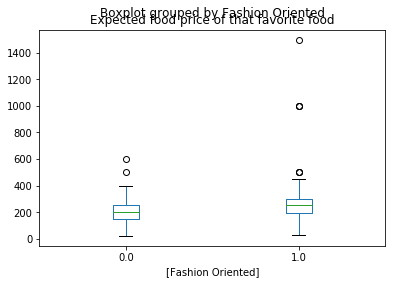

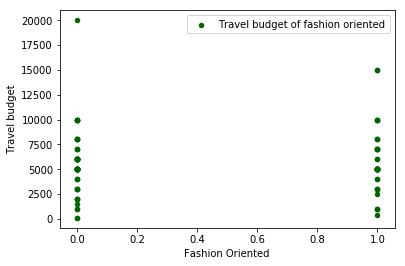

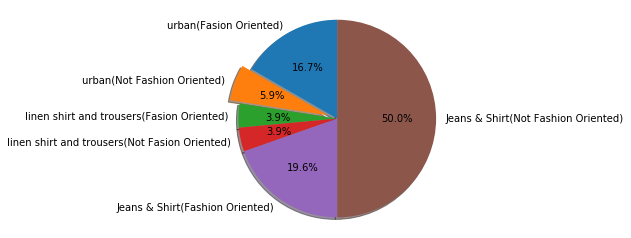

In [21]:
# Correlation
datasetToEval.boxplot(by=['Fashion Oriented'], column=['Expected food price of that favorite food'], grid= False)

# datasetToEval.plot.scatter(x='Fashion Oriented', y='Expected food price of that favorite food', color='DarkBlue', label='Group 1')

datasetToEval.plot.scatter(x='Fashion Oriented', y='Travel budget', color='DarkGreen', label='Travel budget of fashion oriented')

# datasetToEval.plot.scatter(x='Fashion Oriented', y='Wake up time?', rot=0)

lis = [0,0,0,0,0,0]
checkCol = ['Which cloths do you choose to wear','Fashion Oriented']

for i, x in datasetToEval.iterrows():
    if datasetToEval.loc[i, checkCol[0]] == "urban" and datasetToEval.loc[i, checkCol[1]] == 1.0:
        lis[0] += 1
    elif datasetToEval.loc[i, checkCol[0]] == "urban" and datasetToEval.loc[i, checkCol[1]] == 0.0:
        lis[1] += 1    
    elif datasetToEval.loc[i, checkCol[0]] == "linen shirt and trousers" and datasetToEval.loc[i, checkCol[1]] == 1.0:
        lis[2] += 1
    elif datasetToEval.loc[i, checkCol[0]] == "linen shirt and trousers" and datasetToEval.loc[i, checkCol[1]] == 0.0:
        lis[3] += 1
    elif datasetToEval.loc[i, checkCol[0]] == "Jeans & Shirt" and datasetToEval.loc[i, checkCol[1]] == 1.0:
        lis[4] += 1
    elif datasetToEval.loc[i, checkCol[0]] == "Jeans & Shirt" and datasetToEval.loc[i, checkCol[1]] == 0.0:
        lis[5] += 1

labels = 'urban(Fasion Oriented)', 'urban(Not Fashion Oriented)', 'linen shirt and trousers(Fasion Oriented)', 'linen shirt and trousers(Not Fasion Oriented)', 'Jeans & Shirt(Fashion Oriented)', 'Jeans & Shirt(Not Fashion Oriented)'

sizes = [lis[0], lis[1], lis[2], lis[3], lis[4], lis[5]]

explode = (0, 0.1, 0, 0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()